# Theme of this notebook - How to calculate β
* E.g., Estimate the β between AAPL and S&P 500 using monthly data from 2018M1 to 2022M12.

In [1]:
# First, retrive data from Yahoo Finance
# Before retriving data, pandas-datareader should be installed
! pip install pandas-datareader

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cp
import yfinance as yf

# Retrive Apple's data from 2018M1 to 2022M12
apple = yf.download('AAPL', start='2018-01-01', end='2022-12-31')
# Retrive S&P 500(^GSPC)'s data from 2018M1 to 2022M12
benchmark = yf.download('^GSPC',start='2018-01-01', end='2022-12-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


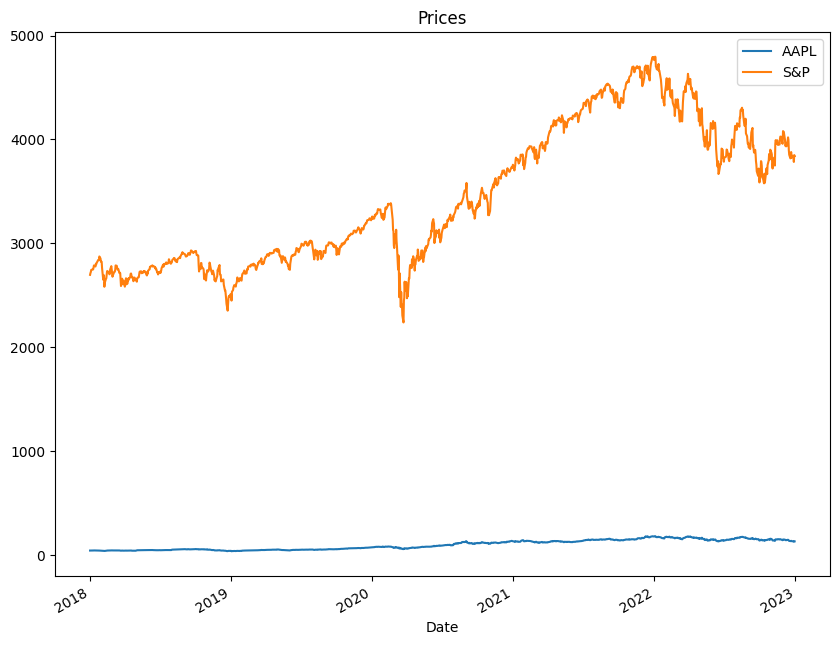

In [3]:
# Check the price
plt.figure(figsize=(10,8))

apple['Adj Close'].plot(label='AAPL')
benchmark['Adj Close'].plot(label='S&P')

plt.title('Prices')
plt.legend()

<Axes: ylabel='Frequency'>

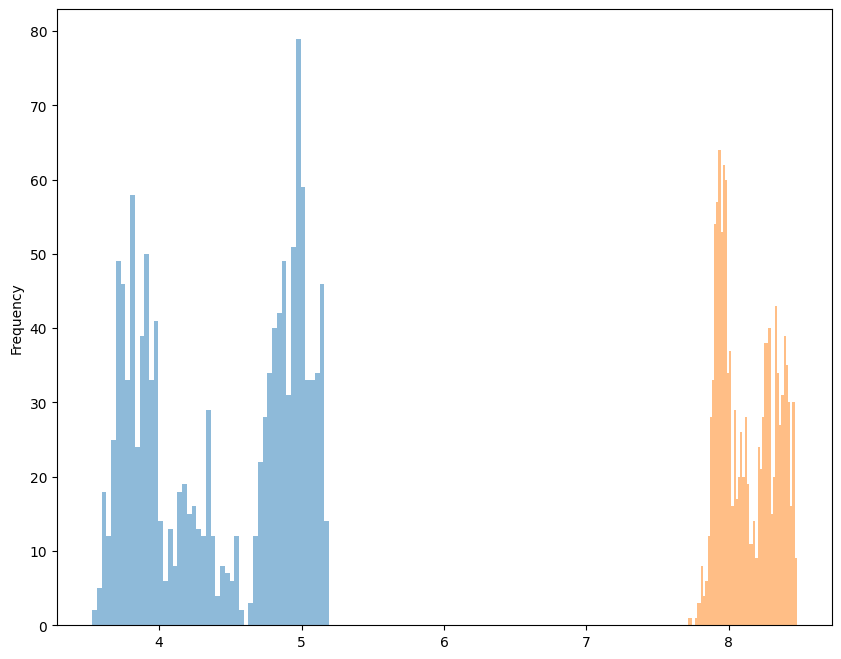

In [4]:
# Check the price
plt.figure(figsize=(10,8))

np.log(apple['Adj Close']).plot(kind='hist', bins=50, alpha=0.5)
np.log(benchmark['Adj Close']).plot(kind='hist', bins=50, alpha=0.5)

<ul>
  <li>Note, the <b>return</b> of a security can be defined as the percentage change of the security's price $$r_{i,t} = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}},$$ where $P_{i,t}$ is the price of security $i$ at time $t$.</li>
</ul>

In [5]:
# Set a variable named returns
returns = pd.DataFrame()

In [6]:
# Calculate each return
returns['AAPL_ret'] = (apple.loc['2018-01-01':'2022-12-31', 'Adj Close'] / apple.loc['2018-01-01':'2022-12-31', 'Adj Close'].shift()) - 1
returns['S&P_ret'] = (benchmark.loc['2018-01-01':'2022-12-31', 'Adj Close'] / benchmark.loc['2018-01-01':'2022-12-31', 'Adj Close'].shift()) - 1
returns

,AAPL_ret,S&P_ret
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.000174,0.006399
2018-01-04,0.004645,0.004029
2018-01-05,0.011385,0.007034
2018-01-08,-0.003714,0.001662
...,...,...
2022-12-23,-0.002798,0.005868
2022-12-27,-0.013878,-0.004050
2022-12-28,-0.030685,-0.012021


<Axes: xlabel='Date'>

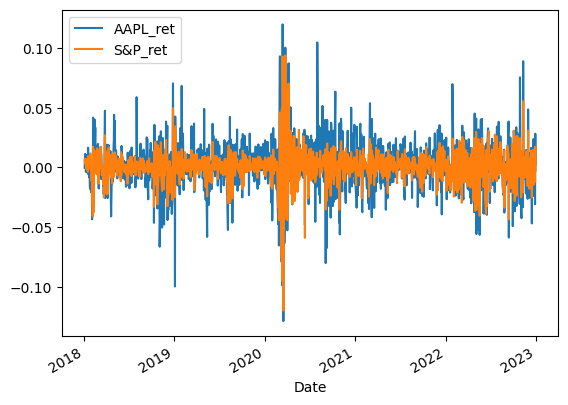

In [7]:
# Check a plot of returns
returns.plot()

<Axes: ylabel='Frequency'>

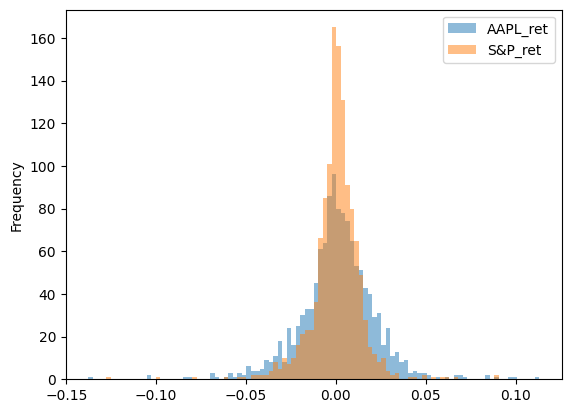

In [8]:
# Check a histogram of logathmic returns
np.log(returns+1).plot(kind='hist', bins=100, alpha=0.5)

In [9]:
# Calculate mean and volatility(= standard deviation)
mean_std = pd.DataFrame({'Mean': returns.mean(),
                        'Volatility': returns.std()})

mean_std

,Mean,Volatility
AAPL_ret,0.001141,0.021094
S&P_ret,0.000376,0.013776


In [10]:
# Calculate correlation coefficient between AAPL and S&P 500
corr = returns.corr()
corr

,AAPL_ret,S&P_ret
AAPL_ret,1.000000,0.801969
S&P_ret,0.801969,1.000000


<ul>
  <li>Note, the <b>beta</b> between a security and market can be defined as the following formula:<br>
  <br>
  $\beta = \frac{\mathrm{Cov}{(r_m,r_i)}}{\sigma_m^2}$
  <br>
  or
  <br>
  $\beta = \rho_{(r_i,r_m)} * \frac{\sigma_i}{\sigma_m}$

  where:
  * $r_m$ is a return of a benchmark.
  * $r_i$ is a return of a security.
  * $\sigma_m$ is a volatility if the benchmark.
  * $\sigma_i$ is a volatility if the security.
  * $\mathrm{Cov}$ is a covariance.
  * $\rho$ is the correlation coefficient.
   </li>
</ul>

In [11]:
# Calculate β by using the second formula
rho = corr.iloc[0,1]
sigma_i = mean_std.iloc[0,1]
sigma_m = mean_std.iloc[1,1]
beta = rho * (sigma_i / sigma_m)

beta

1.2279814673445553

# Conclution
Beta between Apple and S&P500 from 2018M1 to 2022M12 is 1.2279...